# Projeto de Bloco - Entrega de Projeto

Instituto Infnet - Rafael Dottori de Oliveira

20/12/2023

===========================================================================================

Importamos as bibliotecas usadas e o DataFrame com os tratamentos abordados nos TPs 7 e 9.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
melb = pd.read_csv('melb_final.csv')

In [ ]:
melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,TypeIndex,RegionIndex,MethodIndex
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,79.0,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,0,2,1
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,150.0,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,0,2,3
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,142.0,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,0,2,4
3,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,3067.0,...,210.0,1910,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0,0,2,1
4,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,3067.0,...,107.0,1890,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6826,Watsonia,76 Kenmare St,2,h,650000.0,PI,Morrison,2017-08-26,14.5,3087.0,...,79.0,2006,Unavailable,-37.70657,145.07878,Northern Metropolitan,2329.0,0,2,0
6827,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,2017-08-26,14.7,3030.0,...,172.0,1980,Unavailable,-37.89327,144.64789,Western Metropolitan,16166.0,0,6,1
6828,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,...,133.0,1995,Unavailable,-37.85927,144.87904,Western Metropolitan,6380.0,0,6,3
6829,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,...,157.0,1920,Unavailable,-37.85908,144.89299,Western Metropolitan,6380.0,0,6,0


# Alterações no Projeto

Agora exploramos algumas das alterações apontadas nas correções dos trabalhos:

## StandardScaler

Antes usamos o escalonamento via MinMax Scaler, que alterava cada variável de forma individual, espaçando os valores da coluna em uma escala de 0 a 1.

Em alguns casos, teremos variáveis de unidades similares em escalas diferentes. Por exemplo: medidas de preço em milhares x milhões, distâncais em km x km², etc.

Nesses casos, optamos pelo StandardScaler, que se baseia na média e desvio padrão para transformar a base toda numa mesma esclaa.

Dividimos a variável alvo das independentes (como no processo de Regressão Linear) e aplicamos o StandardScaler somente nas variáveis independentes.

In [ ]:
X = melb[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'YearBuilt', 'Propertycount', 'RegionIndex', 'TypeIndex', 'MethodIndex']]
        
y = melb['Price']

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(scaled, columns=['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'YearBuilt', 'Propertycount', 'RegionIndex', 'TypeIndex', 'MethodIndex'])

In [ ]:
X_scaled

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,RegionIndex,TypeIndex,MethodIndex
0,-1.006586,-1.275314,-0.829654,-1.686320,-0.538854,-0.722009,-1.750866,-0.784320,-0.892419,-0.646979,-0.385137
1,0.024761,-1.275314,0.571079,-1.686320,-0.577446,0.069696,-1.750866,-0.784320,-0.892419,-0.646979,1.362949
2,1.056108,-1.275314,-0.829654,0.421889,-0.602004,-0.019510,1.355203,-0.784320,-0.892419,-0.646979,2.236991
3,0.024761,-1.275314,0.571079,-1.686320,-0.382732,0.738743,-1.478403,-0.784320,-0.892419,-0.646979,-0.385137
4,-1.006586,-1.275314,-0.829654,0.421889,-0.363437,-0.409787,-2.023328,-0.784320,-0.892419,-0.646979,-0.385137
...,...,...,...,...,...,...,...,...,...,...,...
6826,-1.006586,0.732851,-0.829654,-0.632216,-0.444128,-0.722009,1.137233,-1.172819,-0.892419,-0.646979,-1.259179
6827,1.056108,0.766320,0.571079,-0.632216,0.348757,0.315013,0.428832,2.008043,1.097174,-0.646979,-0.385137
6828,0.024761,-0.555721,0.571079,0.421889,-0.228365,-0.119867,0.837525,-0.241571,1.097174,-0.646979,1.362949
6829,1.056108,-0.555721,-0.829654,3.584202,0.706608,0.147752,-1.205941,-0.241571,1.097174,-0.646979,-1.259179


## Visualizações de Distribuição

Outro ponto levantado foi na análise e visualização da distribuição dos dados:

Muitas variáveis não seguiam uma distribuição normal, o que dificulta na detecção de pontos fora da curva e na representação dos dados.

Para as variáveis "Landsize" e "BuildingArea", que possuem uma distribuição longa, podemos representá-los com escalas logarítmicas.

In [ ]:
melb['Landsize_log'] = np.log10(melb['Landsize'])
melb['Area_log'] = np.log10(melb['BuildingArea'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


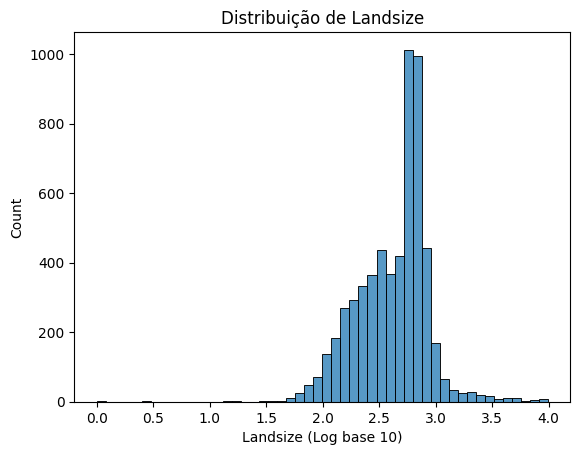

In [ ]:
sns.histplot(melb['Landsize_log'], bins=50)

plt.title('Distribuição de Landsize')
plt.xlabel('Landsize (Log base 10)')
plt.show()

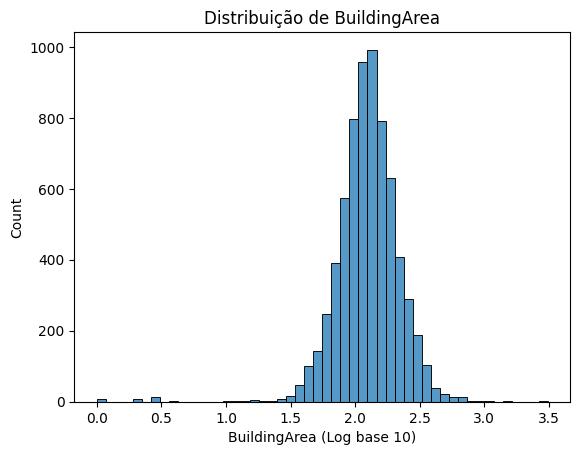

In [ ]:
sns.histplot(melb['Area_log'], bins=50)

plt.title('Distribuição de BuildingArea')
plt.xlabel('BuildingArea (Log base 10)')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c6baa98-47a6-4117-9192-bff03eb76124' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>